In [3]:
%matplotlib inline

# Introduction to Machine Learning & Data Science
Author: Zach Fuller

# Import libraries

In [41]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, mean_squared_error
#Set a seed to initialize random number generator
np.random.seed(3)

# Load and take a look at the data
Dataset describes patients tested for breast cancer, collected by the University of Wisconsin. Is it possible to predict if a suspected tumor is benign or malignant based on examination, without the need for costly bioposy and pathological analysis? Research suggests [more than 300,000 unnecessary surgeries](https://www.nytimes.com/2011/02/19/health/19cancer.html?_r=0) are performed every year, with a cost ranging from \$5,000 - \$12,000 per patient.  

In [42]:
#Import the dataset
dataset = datasets.load_breast_cancer()

#Dimensions of data (569 rows x 30 columns)
# Talk about data, from Wisconsin
print "Dimensions of data: ", dataset.data.shape
print "These are the target names: ", dataset.target_names

#Store the numbers of features, samples and feature names
n_samples, n_features = dataset.data.shape
feature_names = dataset.feature_names
print "This is the list of features to train on"
print feature_names

#Lets put it in a pandas dataframe and take a look
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

Dimensions of data:  (569, 30)
These are the target names:  ['malignant' 'benign']
This is the list of features to train on
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# Some summary statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Split train and test
Here, we are splitting the data into a *training* set to perform supervised learning in order to build the predictive model, and a *test* set to assess our models performance on unseen data. For the test set, we "hide" the correct target labels while making predictions. Afterwards, we will compare our predicted values to the actual values.  

In [43]:
#Test is 30% of the full data. X contains features, Y contains the target
train_X, test_X, train_Y, test_Y = train_test_split(df, dataset.target, test_size=0.3)
print "The dimensions of train are: ", train_X.shape
print "The dimensions of test are: ", test_X.shape

#Store the dimensions of the train and test data
n_features_train, n_samples_train = train_X.shape
n_features_test, n_samples_test = test_X.shape

The dimensions of train are:  (398, 30)
The dimensions of test are:  (171, 30)


# Class Imbalance
Class imbalance is something to keep in mind while building a model. This shows the distribution of malignant and benign tumors in the full data set and the class distribution in the training data.

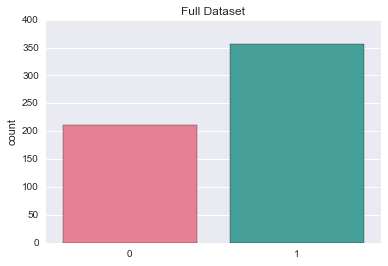

In [25]:
p = sns.countplot(x=dataset.target, palette="husl")
sns.plt.title('Full Dataset')
#Remember 0='malignant', 1='benign'

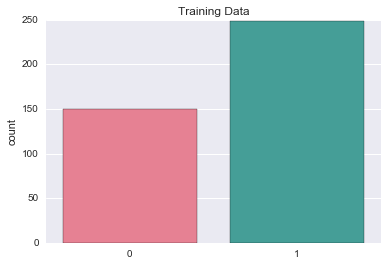

In [26]:
p = sns.countplot(x=train_Y, palette="husl")
sns.plt.title('Training Data')
#Remember 0='malignant', 1='benign'

# Build a model
Here, we are going to build the model using our features. We will be using a classifying algorithm called "random forest". Find more information [here](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). A random forest is an *ensemble* method, using the combined estimates of several *decision trees* constructed from random subsets of the data. Decision trees are predictive models where each node splits the data by a feature attribute to best partition the data into classes. Parameters to change the maximum depth of each tree, the criterion used to split the data, etc. can all be set when the model is instantiated.
Example decision tree from the Titanic dataset:
![alt-text](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

In [27]:
#Instantiate model
model = RandomForestClassifier(n_estimators=100, min_samples_split=3)
#Fit model to train
model.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
#Lets get the predictions
preds = model.predict(test_X)
print preds[1:10]
#...but instead of predicted labels, lets get the probability of belonging to a class
probs = model.predict_proba(test_X)
#This returns an n-dimensional numpy array, where n=number of classes in target
print probs[1:10]

[1 1 1 0 1 1 1 1 1]
[[ 0.07   0.93 ]
 [ 0.     1.   ]
 [ 0.01   0.99 ]
 [ 0.965  0.035]
 [ 0.005  0.995]
 [ 0.     1.   ]
 [ 0.01   0.99 ]
 [ 0.     1.   ]
 [ 0.     1.   ]]


It's important to take a look at the distribution of predicted probabilities. A large skew may represent a poor model

(array([ 50.,   7.,   2.,   1.,   1.,   1.,   3.,   5.,   8.,  93.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

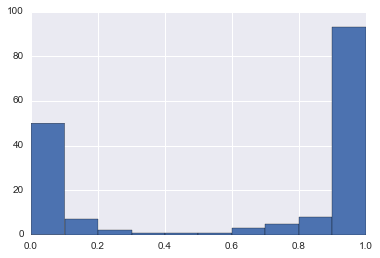

In [30]:
#Store probabilites of benign and malignant predictions
prob_benign = probs[::,1]
prob_malignant = probs[::,0]
#Look at the distribution of being benign
plt.hist(prob_benign)

# Evaluate the model
Model evaluation is a key part of machine learning and data science. We need to know how our model is performing in order to improve it. Some common methods include 'confusion matrices', 'roc curves' and 'mean squared error'

### Confusion matrix
Let's start with a confusion matrix. This shows you the correct class (i.e. 'label') for each sample in the test, along with the class our model predicted. Here, we can see the numbers of Type I Errors (false positives) and Type II Errors (false negatives)

In [31]:
#Create vectors of actual class labels and predicted labels
y_true = pd.Series(test_Y)
y_pred = pd.Series(preds)
pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,57,5,62
1,4,105,109
All,61,110,171


### ROC Curve
Reciever operating characteristic (ROC) curves are useful in evaluating our model performance and good for binary (0,1) classification problems. It shows the False Positive Rate (Type I Error) vs. the True Positive Rate

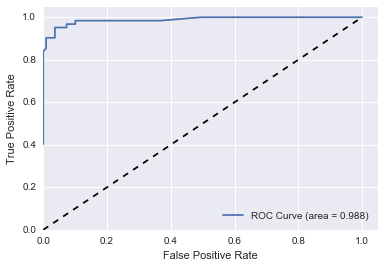

In [238]:
#Use (1-test_Y) to make null hypothesis a benign tumor
fpr, tpr, thresholds = roc_curve(1-test_Y, prob_malignant)
roc_auc = auc(fpr, tpr)
plt.clf()
plt.plot(fpr, tpr, label="ROC Curve (area = %0.3f)" % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [239]:
print "Mean Square Error (MSE): ", mean_squared_error(1-test_Y, prob_malignant)

Mean Square Error (MSE):  0.0367260640026


Logarithmic loss is a commonly used metrix to evaluate model performance when the predictions are probabilities. It provides punishments for both being confident and wrong. In the function below 'epsilon' sets bounds on the min and max to prevent a value of infinity.

In [32]:
#Function used to calculate log-loss
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1, act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll

print "Log loss is: ", logloss((1-test_Y), prob_malignant)

Log loss is:  0.128004450969


# Feature Importance
Lets look at what features are important for our model. The higher the number, the more important the feature

Feature ranking:
1. mean radius (0.117595)
2. mean texture (0.114332)
3. mean perimeter (0.112637)
4. mean area (0.111330)
5. mean smoothness (0.109011)


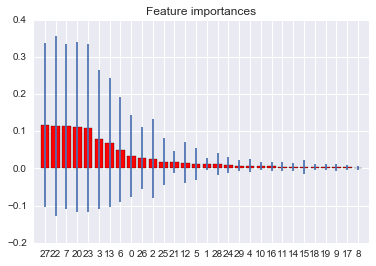

In [33]:
#Store the names of the features
train_feature_names = train_X.keys()
#Get the values for the importance of each feature
importances = model.feature_importances_
#Get the st dev of the importances
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking for the top 5
print("Feature ranking:")
for f in range(5):
    print("%d. %s (%f)" % (f + 1, train_feature_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

# Feature Engineering
In a real world application, we would be applying our model to unseen data where we don't know the actual target label. Would we feel confident diagnosing an unknown tumor as benign or malignant? We have constructed a predictive model that seems to perform reasonably well, but can we do any better? In practice, building a good model is an iterative process. After we evaluate a model, we go back to the beginning and apply what we have learned during our assesment to see if we can improve it. This process of evaluating a model against a holdout set of data where we *do* know the target label, as we have done here, is known as *cross validation* (CV). Sci-kit learn [provides](http://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold) [several](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.LeaveOneOut.html#sklearn.cross_validation.LeaveOneOut) [options](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html#sklearn.cross_validation.KFold) to perform more sophisticated CV schemes.

Lets take a more in-depth look at some of the features and perform some simple transformations...

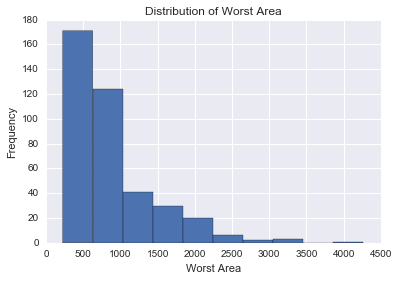

In [34]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist((train_X['worst area']),bins=10)
plt.title('Distribution of Worst Area')
plt.xlabel('Worst Area')
plt.ylabel('Frequency')

We can see in the above plot that there is a positive skew for this feature (mean worst area). Will a log transform help to make this look more normally distributed?

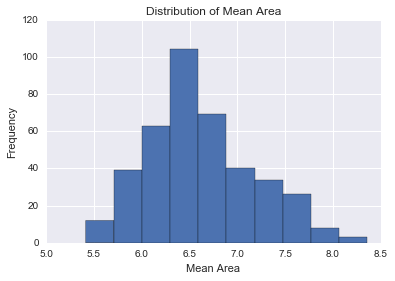

In [35]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(np.log(train_X['worst area']+1),bins=10)
plt.title('Distribution of Mean Area')
plt.xlabel('Mean Area')
plt.ylabel('Frequency')

That looks better. For many classification algorithms, it can help to have the values for each feature to be normally distributed. So, lets go ahead and apply this transformation to our train and test data.

In [36]:
transformed_features = []
#So that we can add a new column to the pandas dataframes
train_X.is_copy = False
test_X.is_copy = False
#Log transform train and test
train_X['log worst area'] = np.log(train_X['worst area']+1)
test_X['log worst area'] = np.log(test_X['worst area']+1)
#Add our transformed feature name to a list so we can keep track of it later on
transformed_features.append('worst area')

Lets try to think about what features might intuitivly have an affect on whether a tumor is malignant or benign. Maybe the worst smoothness? Here we can add a new feature that will divide 'worst smoothness' into 5 different bins. 1 will contain the smallest 20% of values, while 5 would contain the largest 20% of values. This method transforms a continuous variable into a discrete variable. It is important to concatenate the train and test data for transformations that take into account the distribution of the data.

In [37]:
all_smoothness = pd.DataFrame(np.hstack((train_X['worst smoothness'],test_X['worst smoothness'])))
#Here we are creating bins of 20% or .2
bins = list(all_smoothness.quantile([0,.2,.4,.6,.8,1])[0])
#Use cut function from pandas...don't worry about this part
train_X['worst smoothness bin'] = pd.cut(train_X['worst smoothness'], bins=bins, labels = [1,2,3,4,5],include_lowest=True)
test_X['worst smoothness bin'] = pd.cut(test_X['worst smoothness'], bins=bins, labels = [1,2,3,4,5],include_lowest=True)
#Keep track of the transformed feature
transformed_features.append('worst smoothness')

#Lets take a look at the transformed data frame
train_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,log worst area,worst smoothness bin
473,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,0.05960,...,85.08,558.9,0.09422,0.05213,0.0000,0.00000,0.2409,0.06743,6.327758,1
211,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,0.06057,...,85.22,546.3,0.12800,0.18800,0.1471,0.06913,0.2535,0.07993,6.304997,3
302,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,158.80,1696.0,0.13470,0.33910,0.4932,0.19230,0.3294,0.09469,7.436617,3
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,195.00,2227.0,0.12940,0.38850,0.4756,0.24320,0.2741,0.08574,7.708860,3
434,14.86,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,...,102.30,777.5,0.12180,0.15500,0.1220,0.07971,0.2525,0.06827,6.657369,2


It is probably a good idea to remove the raw features that we performed trasnformations on. 

In [38]:
#Axis 1 is 'vertical' or columns
train_X = train_X.drop(transformed_features, axis=1)
test_X = test_X.drop(transformed_features, axis=1)

Now let's see if these transformations worked...

In [39]:
model.fit(train_X, train_Y)
#Lets get the predictions again
preds = model.predict(test_X)
probs = model.predict_proba(test_X)
prob_benign = probs[::,1]
prob_malignant = probs[::,0]

In [40]:
print "Log loss is: ", logloss((1-test_Y), prob_malignant)

Log loss is:  0.122755253083


# Your turn!

Did our transforamtions actually help? What if we use just the 5 best features? The best 10? What happens if we use 1000 trees instead of 100? What if we discretized all continuous features? What happens if we make really short trees? Really long ones?

Spend 15-20 minutes seeing if you (or small groups) can beat the logloss score of our current, baseline model. If it improved, be prepared to share what you did. If it is much worse, what did you do?